## Introduction

## Lesson 1: Graphs

### Principles of Analytic Graphics

1. Show comparisons
1. Show causality, mechanism, explanation, systematic structure
1. Show multivariate data
1. Integration of evidence
1. Describe and document the evidence with appropriate labels, scales, sources, etc
1. Content is king

Edward Tufte

## Exploratory Graphs

Why do we use graphs in data analysis?
- To understand data properties
- To find patterns in data
- To suggest modelling strategies
- To 'debug' analses
- To communicate results

In [2]:
# library("ggplot2")

In [7]:
# ?par

## Lesson 2: Plotting

3 plotting systems in R
- The Base Plotting system e.g. `plot()`
- The Lattice System e.g. `xyplot()`, `bwplot()`
- The `ggplot()` system

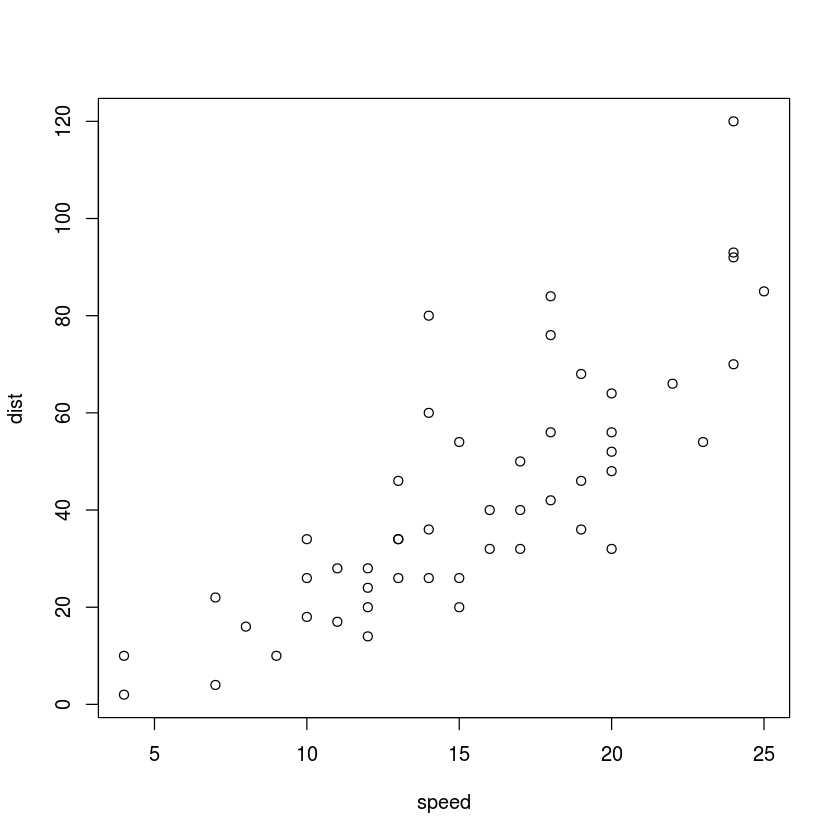

In [18]:
# Base R plotting
library(datasets)
data(cars)
with(cars, plot(speed, dist))

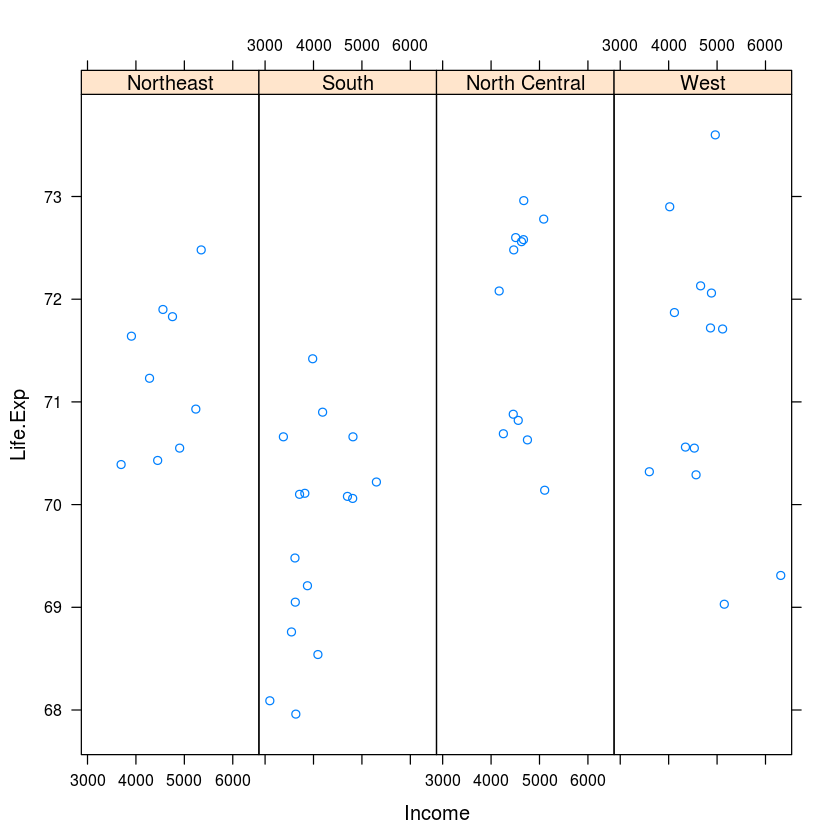

In [20]:
# Lattice Plot
library(lattice)
state <- data.frame(state.x77, region = state.region)
xyplot(Life.Exp ~ Income | region, data = state, layout = c(4,1))

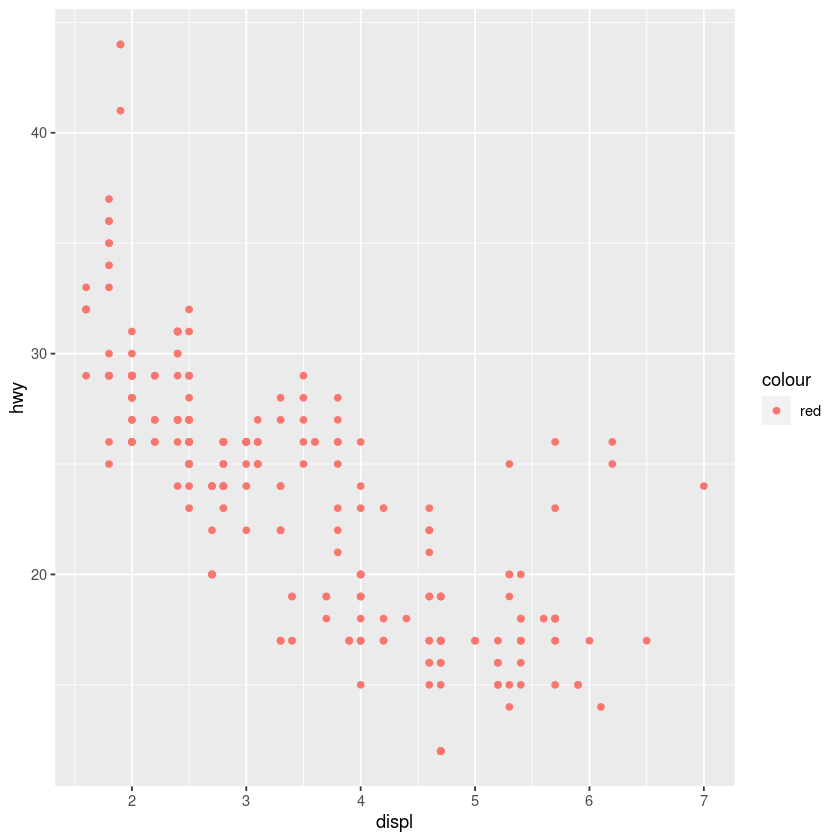

In [22]:
# ggplot2
library(ggplot2)
data(mpg)
qplot(displ, hwy, data = mpg, col = 'red')

### The Base Plotting System in R

The core plotting & graphics engine in R is encapsulated in the following packages:
- *graphics*: contains plotting functions for the 'base' graphing systems, including `plot, hist, boxplot` and many others
- *grDevices*: contains all the code implementing the various graphics devices, including `X11, PDF, PostScript, PNG`, etc

The lattice plotting system is implemented using the following packages:
- *lattice*: contains code for producing Trellis graphics, which are independent of 'base' graphics system; includes functions like `xyplot, bwplot, levelplot`
- *grid*: implements a different graphing system independent of the 'base' system: the *lattice* packages builds on top of *grid*; we seldomly call functions from the *grid* package directly

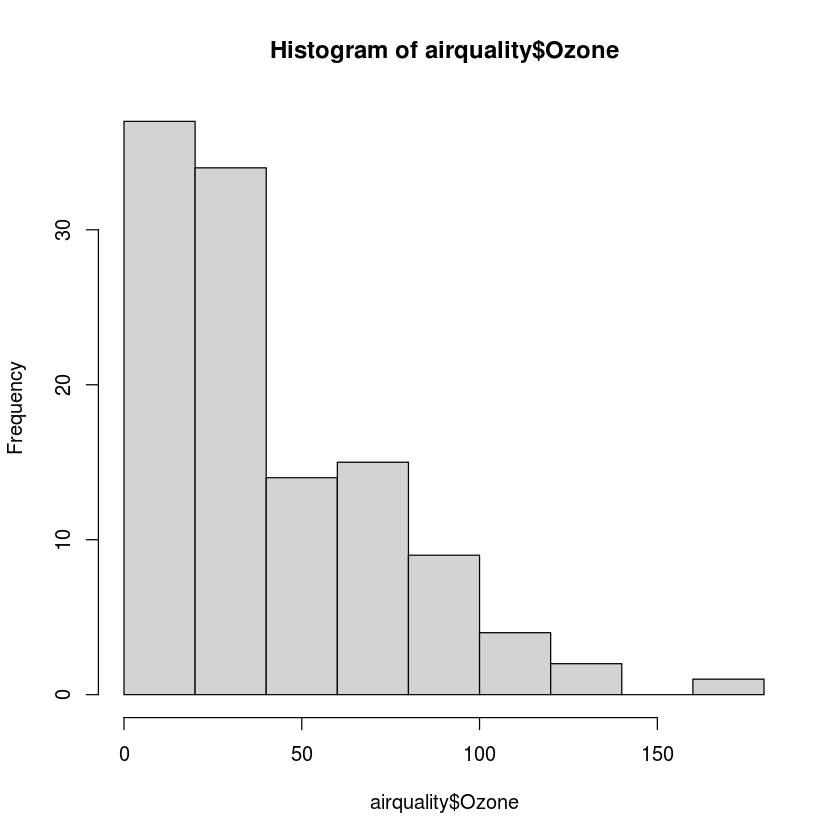

In [28]:
library(datasets)
hist(airquality$Ozone)

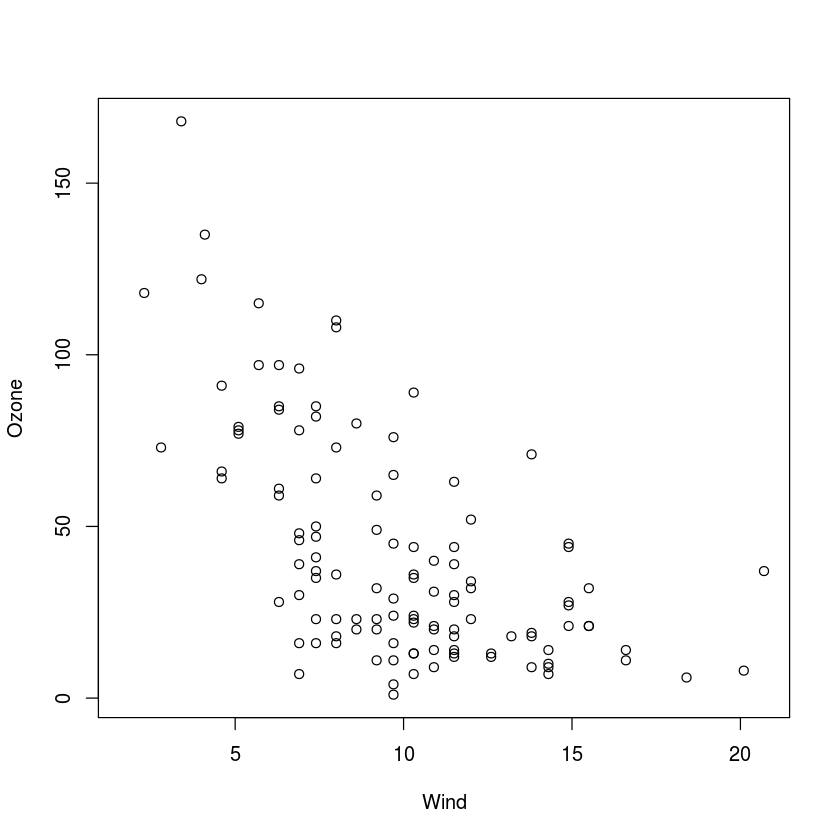

In [25]:
with(airquality, plot(Wind, Ozone))

In [29]:
head(airquality)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<fct>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [30]:
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : Factor w/ 5 levels "5","6","7","8",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [31]:
airquality <- transform(airquality, Month = factor(Month))
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : Factor w/ 5 levels "5","6","7","8",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


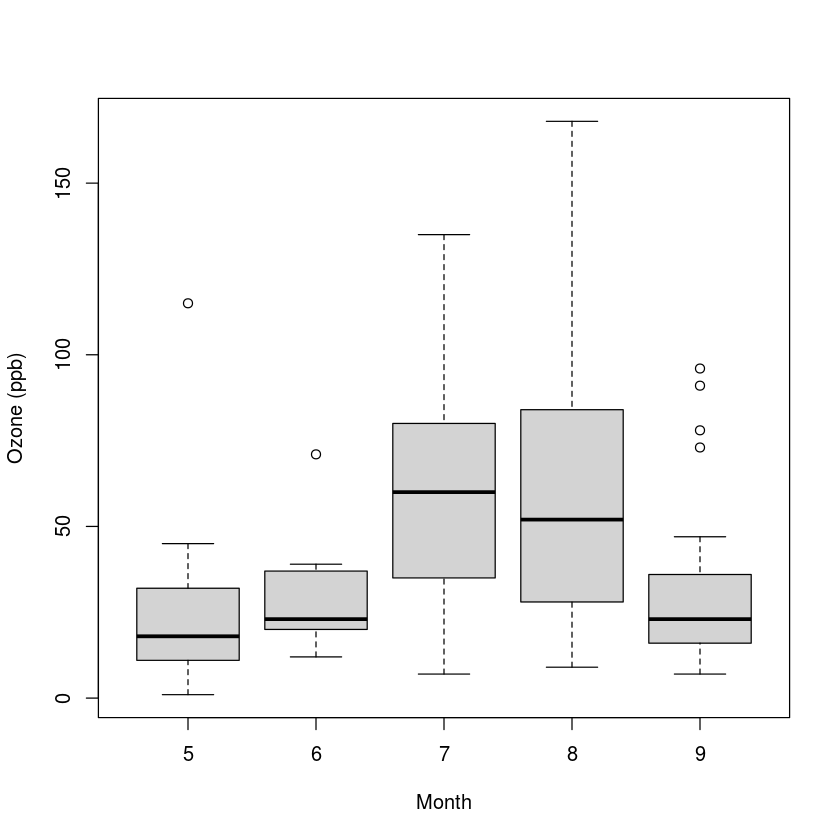

In [32]:
boxplot(Ozone ~ Month, airquality, xlab = 'Month', ylab = 'Ozone (ppb)')

`colors()` gives a vector of colors by name 

`example(points)` gives a list of point types (argument `pch`)

In [76]:
# example(points)

`par()` is used to specify **global** graphic parameters that affect all plots in an R session
- `las`: the orientation of the axis labels on the plot, default
- `bg`: the background color
- `mar`: the margin size
- `oma`: the outer margin size (default = 0)
- `mfrow`: number of plots per row, column (plots are filled row-wise)
- `mfcol`: number of plots per row, column (plots are filled column-wise)

In [74]:
# default values
# par('bg')
# par("mar")
# par("mfrow")
# par('mfcol')

### Base Plotting Functions
- `plot`
- `lines`
- `points`
- `text`
- `title`
- `mtext`
- `axis`

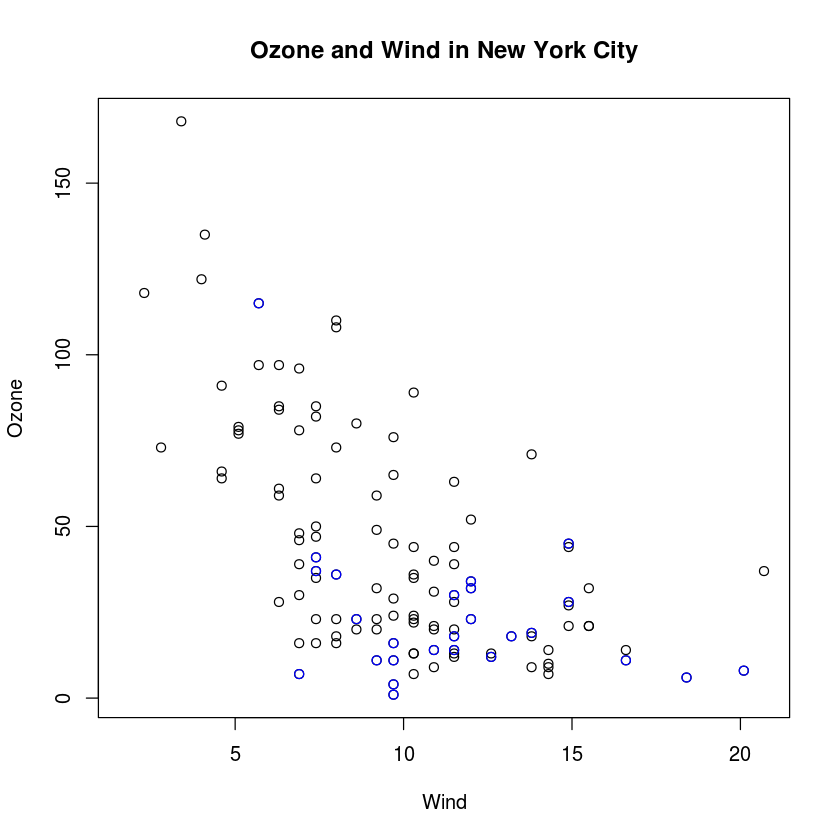

In [43]:
with(airquality, plot(Wind, Ozone, main = 'Ozone and Wind in New York City'))
with(subset(airquality, Month == 5), points(Wind, Ozone, col='blue'))

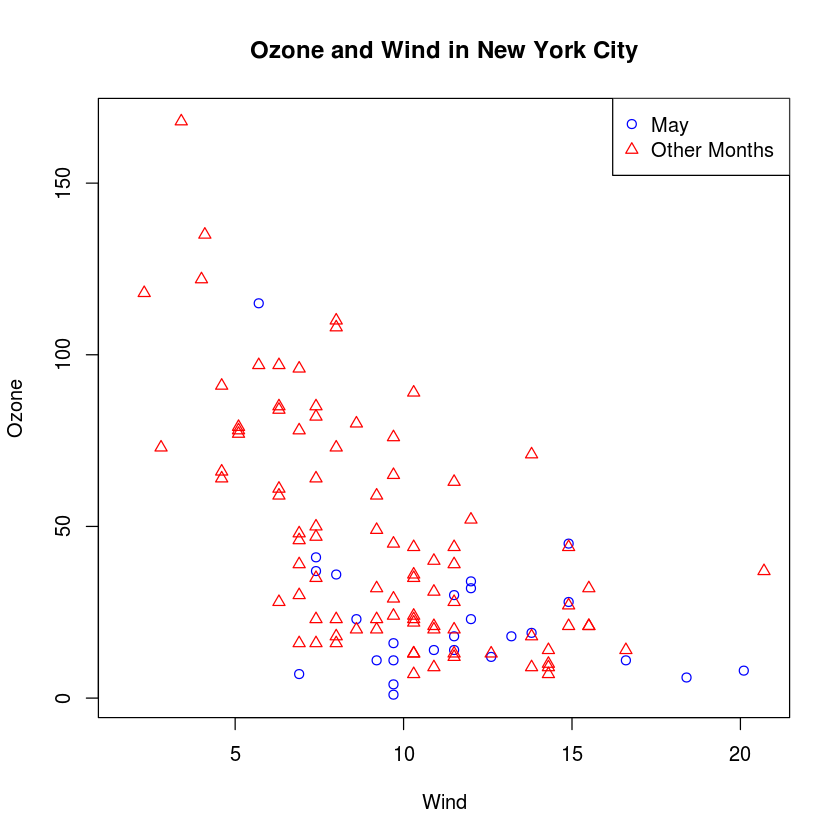

In [47]:
with(airquality, plot(Wind, Ozone, main = 'Ozone and Wind in New York City', type = 'n'))
with(subset(airquality, Month == 5), points(Wind, Ozone, col='blue', pch = 1))
with(subset(airquality, Month != 5), points(Wind, Ozone, col='red', pch = 2))
legend("topright", pch = c(1,2), col=c("blue", "red"), legend = c("May", "Other Months"))

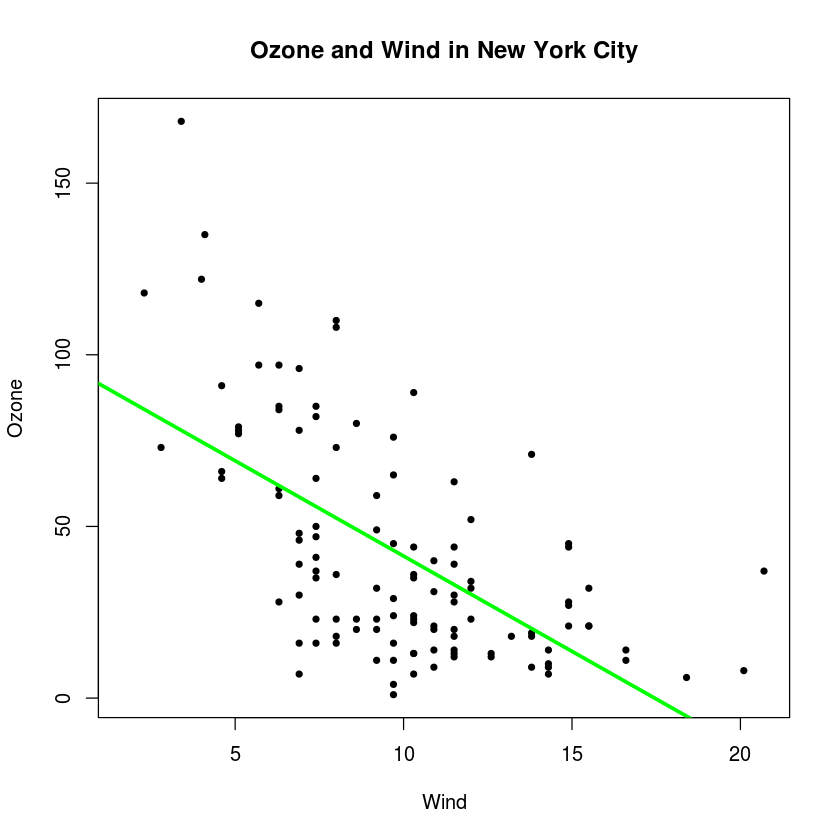

In [55]:
with(airquality, plot(Wind, Ozone, main = 'Ozone and Wind in New York City', pch = 20))
model <- lm(Ozone ~ Wind, data = airquality)
abline(model, lwd=3, col='green')

In [56]:
summary(model)


Call:
lm(formula = Ozone ~ Wind, data = airquality)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.572 -18.854  -4.868  15.234  90.000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  96.8729     7.2387   13.38  < 2e-16 ***
Wind         -5.5509     0.6904   -8.04 9.27e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.47 on 114 degrees of freedom
  (37 observations deleted due to missingness)
Multiple R-squared:  0.3619,	Adjusted R-squared:  0.3563 
F-statistic: 64.64 on 1 and 114 DF,  p-value: 9.272e-13


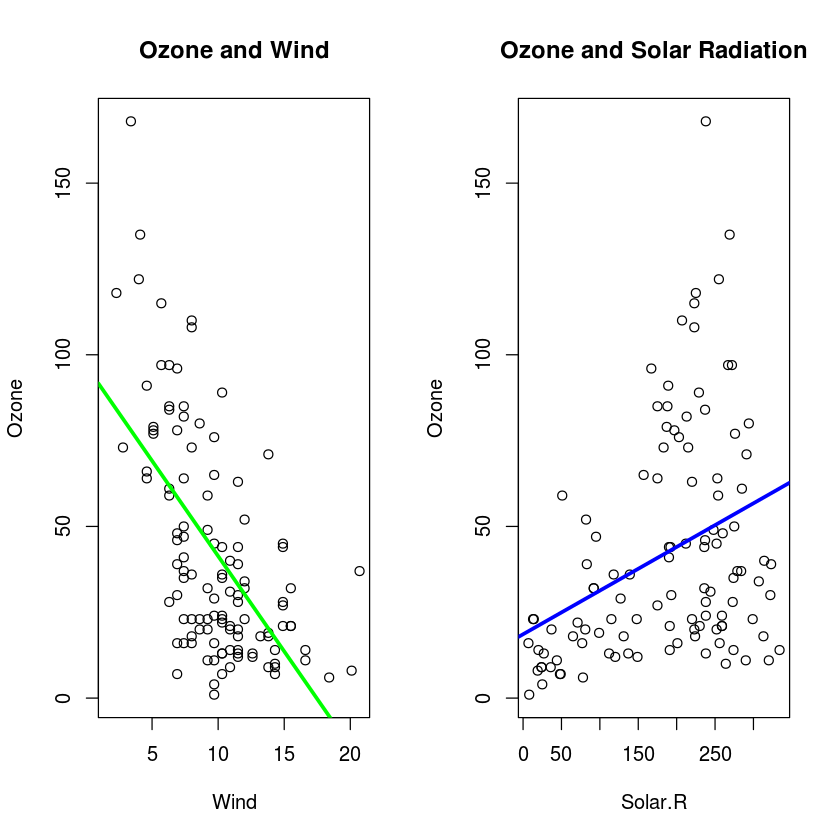

In [60]:
par(mfrow = c(1,2))
modelWO <- lm(Ozone ~ Wind, data = airquality)
modelRO <- lm(Ozone ~ Solar.R, data = airquality)
with(airquality,{
    plot(Wind, Ozone, main = "Ozone and Wind")
    abline(modelWO, col='green', lwd = 3)
    plot(Solar.R, Ozone, main = 'Ozone and Solar Radiation')
    abline(modelRO, col='blue', lwd = 3)
})

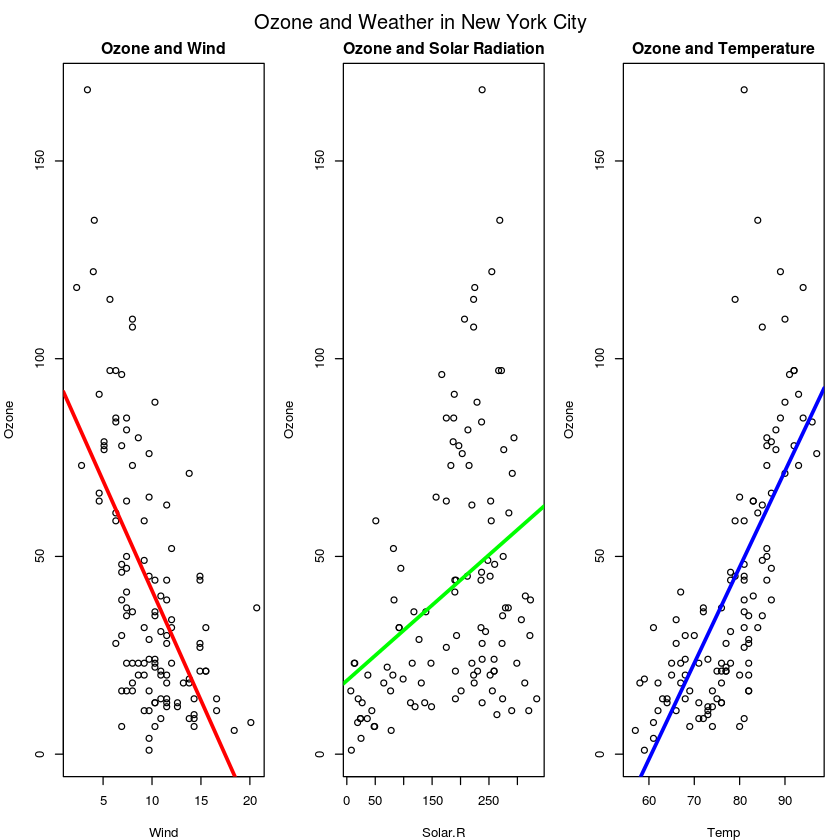

In [62]:
par(mfrow = c(1,3), mar = c(4, 4, 2, 1), oma = c(0, 0, 2, 0))
modelWO <- lm(Ozone ~ Wind, data = airquality)
modelRO <- lm(Ozone ~ Solar.R, data = airquality)
modelTO <- lm(Ozone ~ Temp, data = airquality)
with(airquality,{
    plot(Wind, Ozone, main = "Ozone and Wind")
    abline(modelWO, col='red', lwd = 3)
    plot(Solar.R, Ozone, main = 'Ozone and Solar Radiation')
    abline(modelRO, col='green', lwd = 3)
    plot(Temp, Ozone, main = 'Ozone and Temperature')
    abline(modelTO, col = 'blue', lwd = 3)
    mtext("Ozone and Weather in New York City", outer = TRUE)
})

## Base Plotting Demonstration

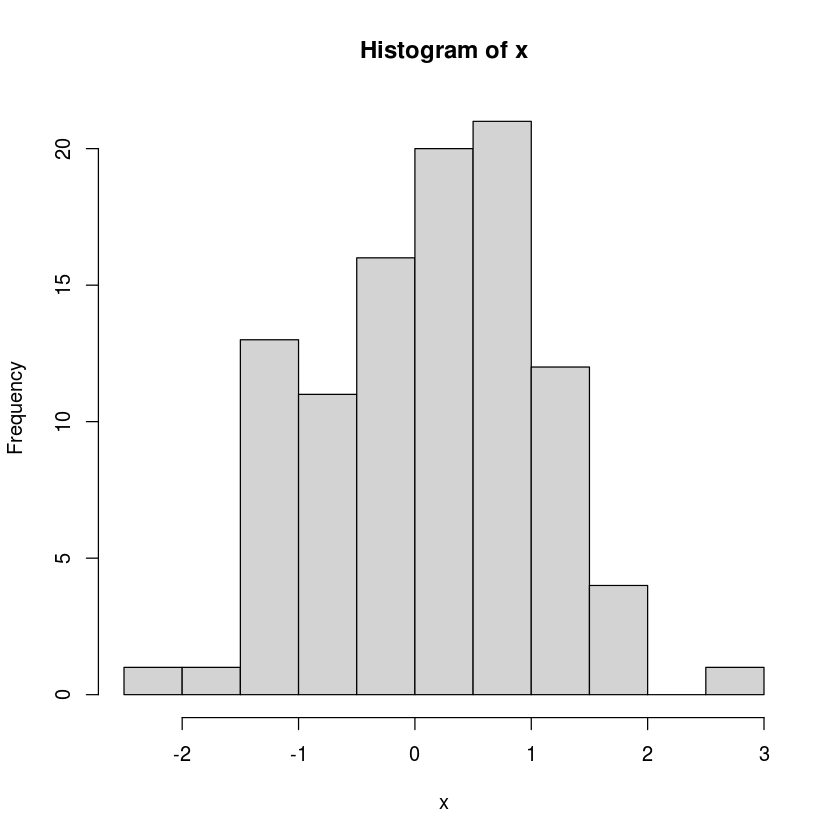

In [64]:
x <- rnorm(100)
hist(x)

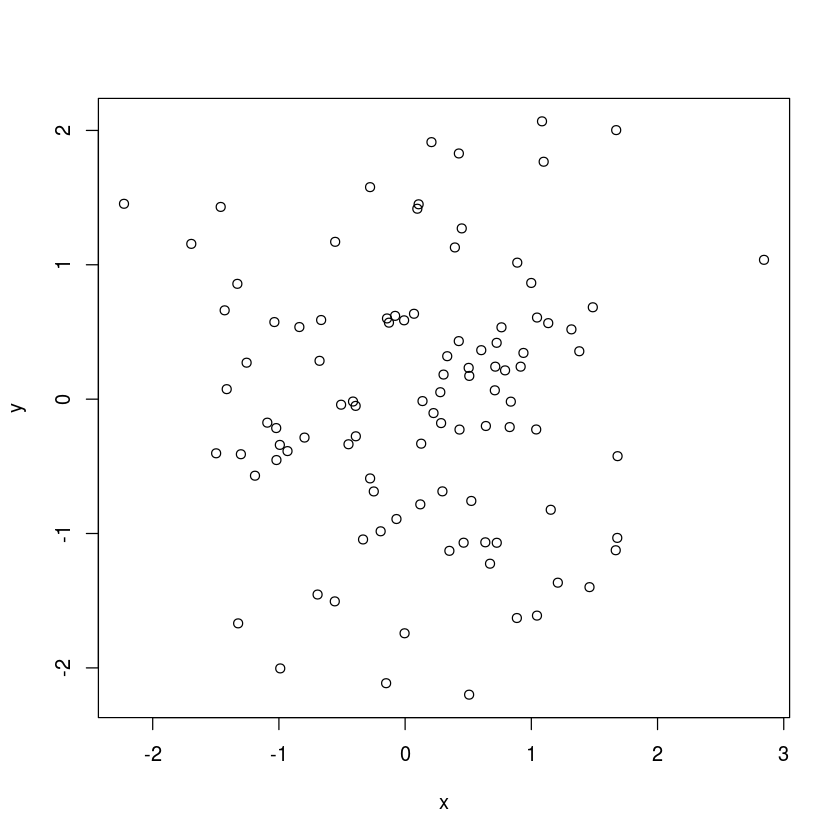

In [68]:
y <- rnorm(100)
model <- lm(y ~ x)
plot(x, y)
#abline(model, col="blue", lwd = 3) # it does not make much sense

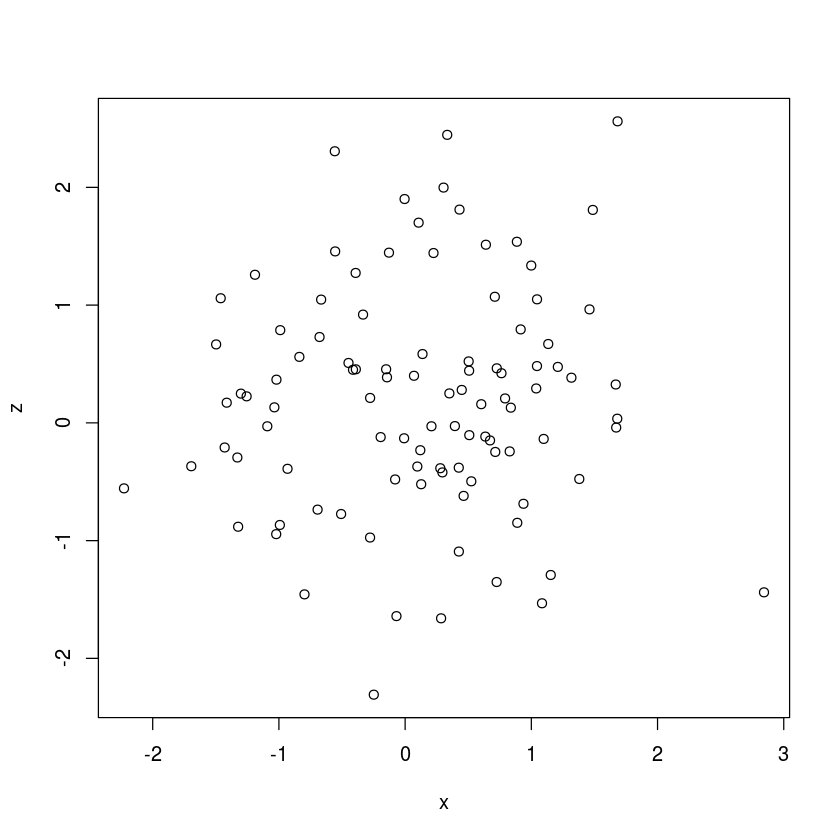

In [69]:
z <- rnorm(100)
plot(x, z)

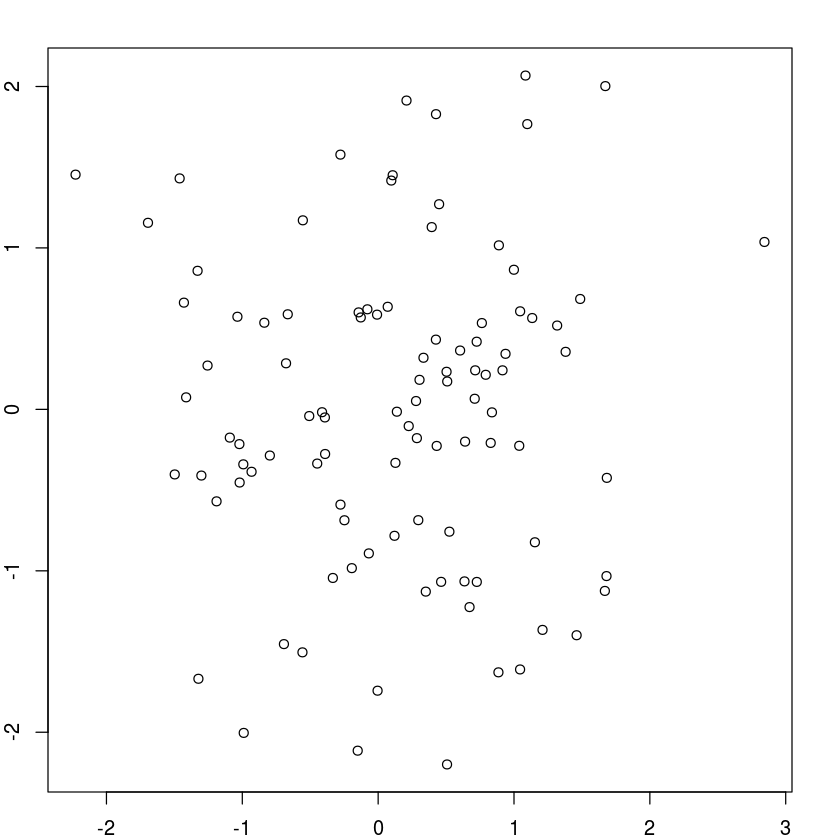

In [71]:
par(mar=c(2,2,2,2))
plot(x,y) # narrower margin, but i lost my label

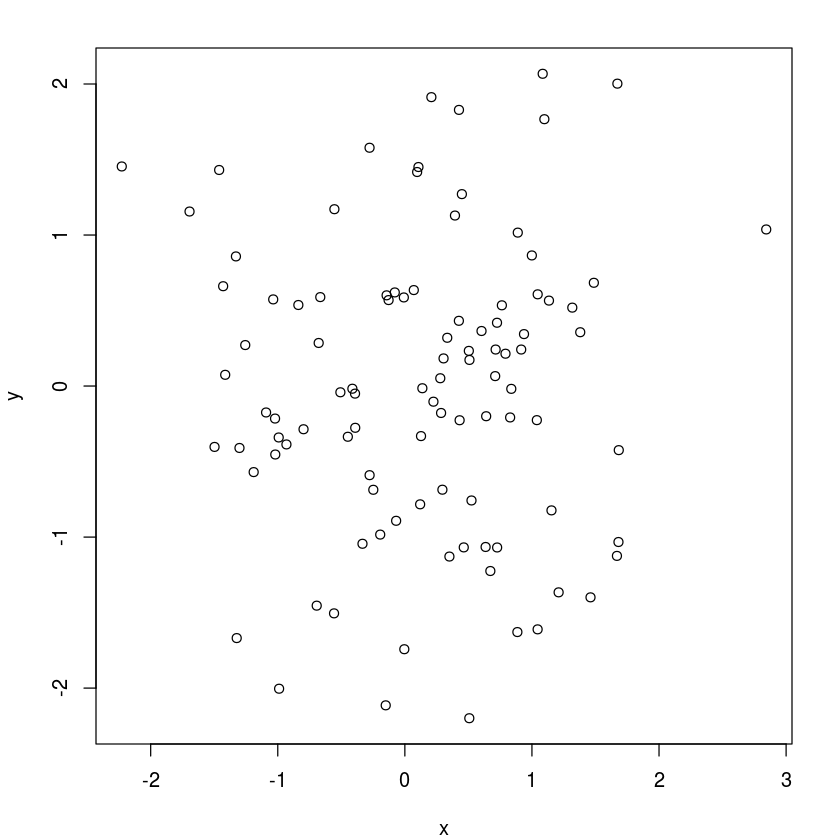

In [73]:
par(mar=c(4,4,2,2))
plot(x,y) # and i got my labels back

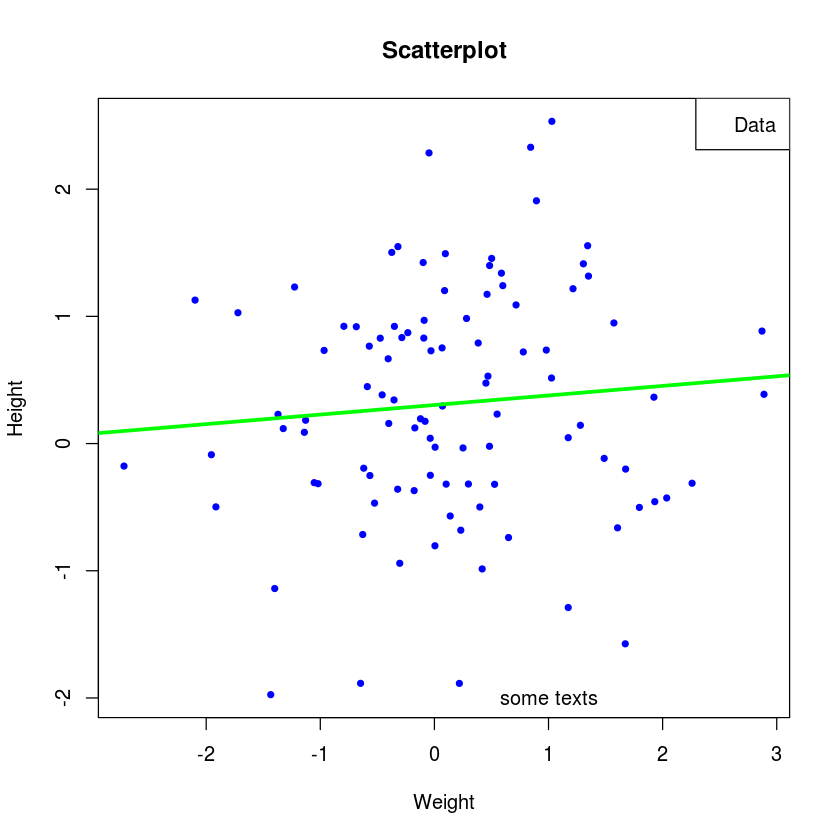

In [108]:
x <- rnorm(100)
y <- rnorm(100)
plot(x, y, pch = 20, col = 'blue', xlab = 'Weight', ylab='Height')
title("Scatterplot")
text(1, -2, "some texts")
legend('topright', legend = 'Data')
fit <- lm(y ~ x)
abline(fit, lwd = 3, col = 'green')
#save.image("./plot_test.png")
#dev.off()
#dev.off()

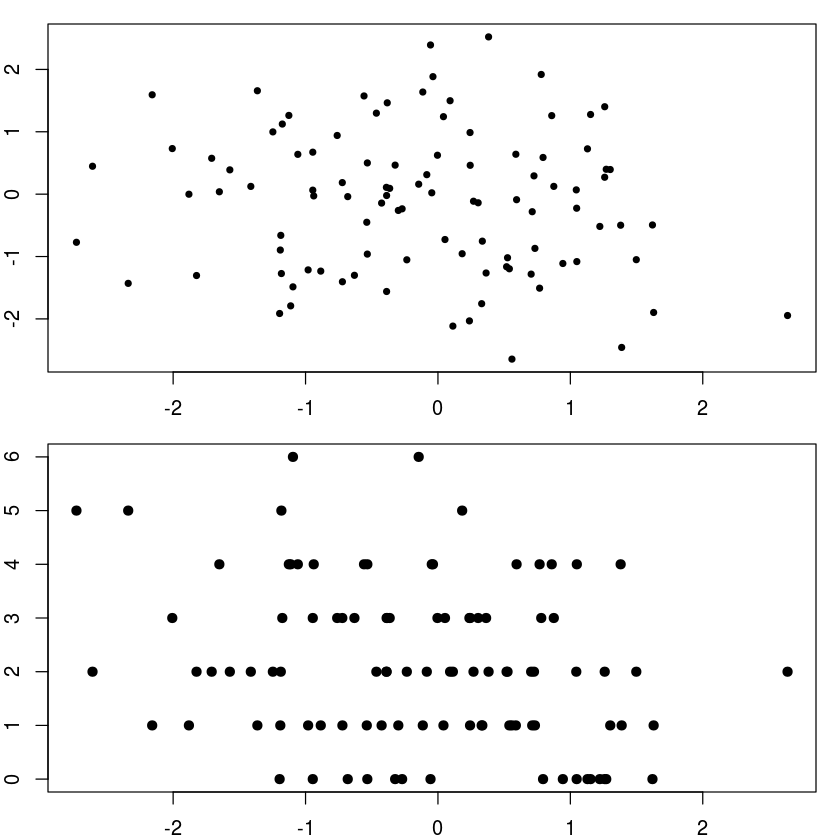

In [95]:
z <- rpois(100, 2)
par(mfrow = c(2,1), mar = c(2,2,1,1))
plot(x, y, pch = 20)
plot(x, z, pch = 19)

In [98]:
set.seed(2)
par(mfrow = c(1,1))
x <- rnorm(100)
y <- x + rnorm(100)
g <- gl(2, 50, labels = c('Male', 'Female'))
str(g)

 Factor w/ 2 levels "Male","Female": 1 1 1 1 1 1 1 1 1 1 ...


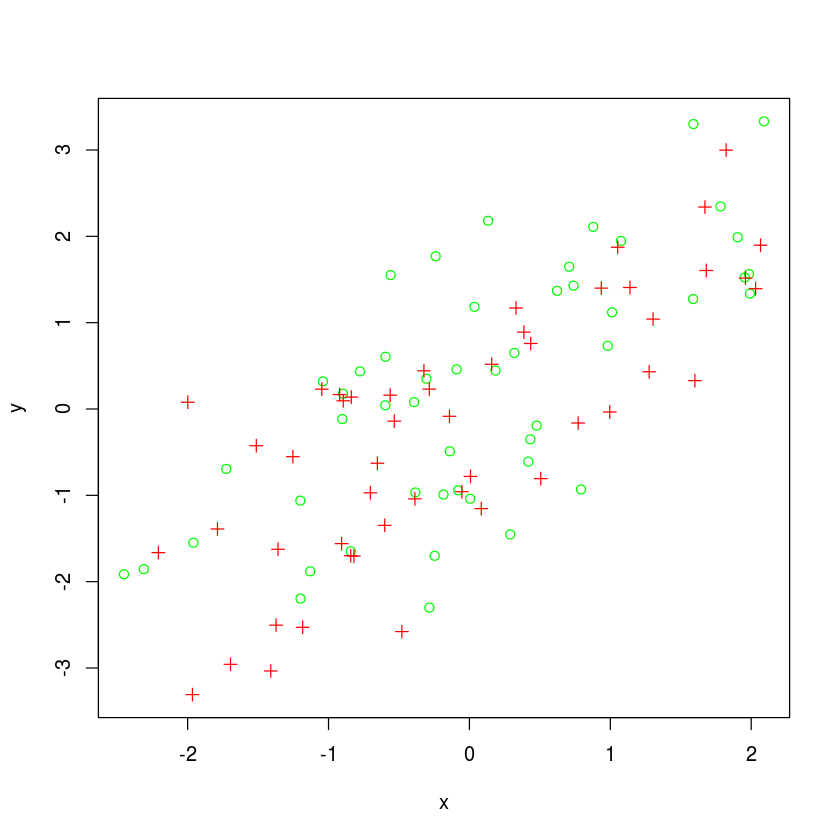

In [104]:
# 在画布中体现出male / female的区别
plot(x, y , type = 'n') # draw an empty canvas
points(x[g == 'Male'], y[g == 'Male'], col = 'green', pch = 1)
points(x[g == 'Female'], y[g == 'Female'], col = 'red', pch = 3)

## Graphics Device

The most common place for a plot to be "sent" is the *screen device*
- `quartz()` on Mac
- `windows()` on Windows
- `x11()` on Unix/Linux

Not all graphics devices are available on all platforms

In [110]:
#?Devices
pdf(file = 'plot_test.pdf')
plot(x, y , type = 'n', main = 'Some data') # draw an empty canvas
points(x[g == 'Male'], y[g == 'Male'], col = 'green', pch = 1)
points(x[g == 'Female'], y[g == 'Female'], col = 'red', pch = 3)
dev.off()

png 
  2

In [111]:
dev.cur()

png 
  2

png 
  6

png 
  2

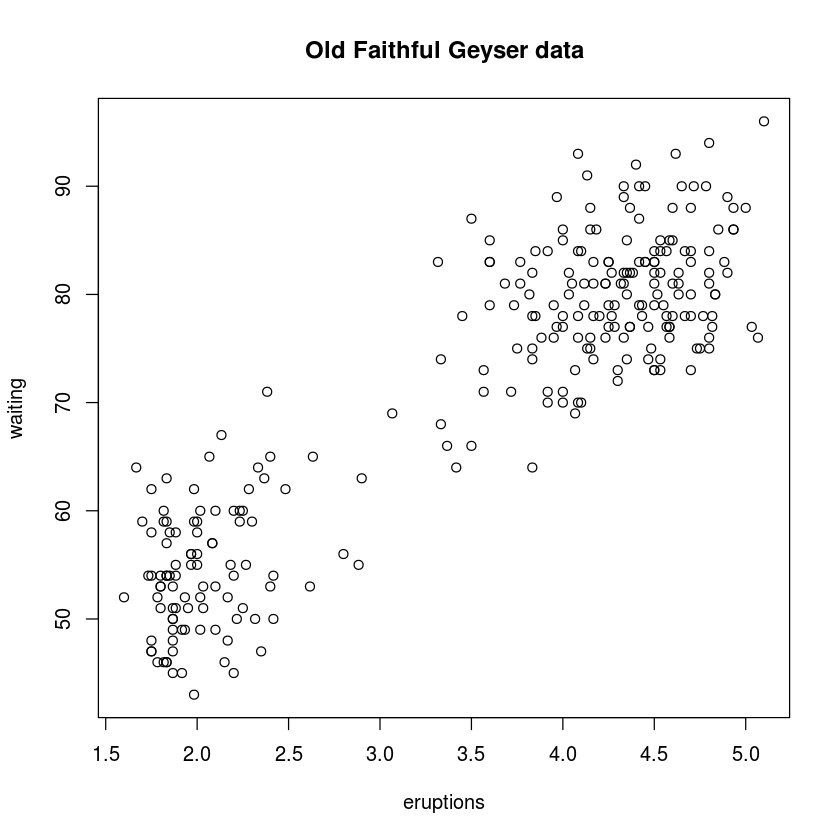

In [118]:
library(datasets)
with(faithful, plot(eruptions, waiting, main = "Old Faithful Geyser data"))
dev.copy(png, file = "./data/geyserplot.png")
dev.off()

pdf 
  6

png 
  2

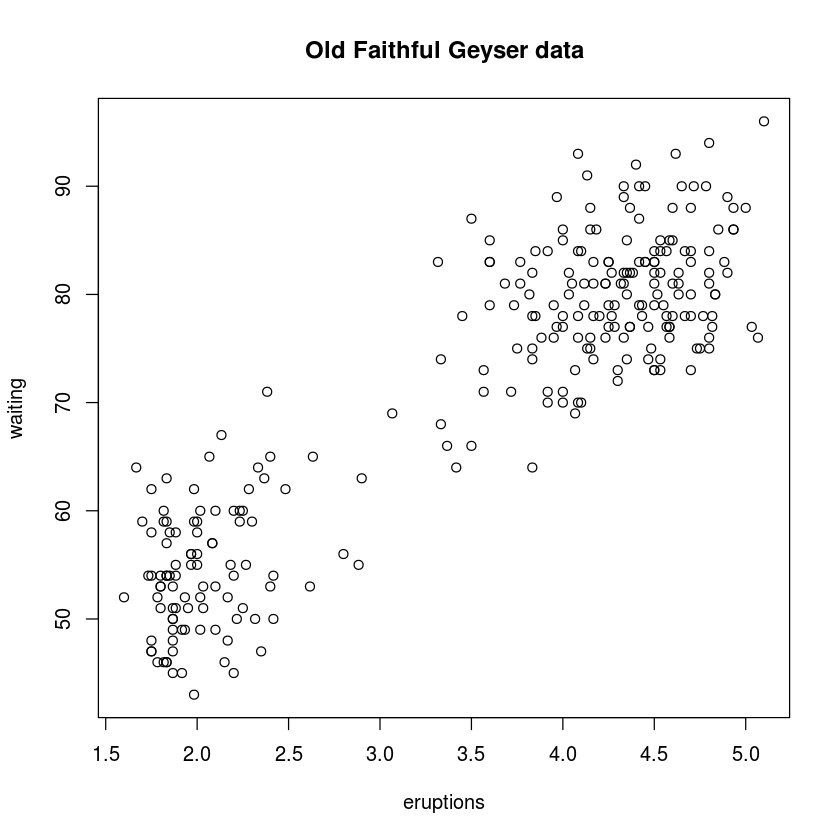

In [121]:
library(datasets)
with(faithful, plot(eruptions, waiting, main = "Old Faithful Geyser data"))
dev.copy(pdf, file = "./data/geyserplot.pdf")
dev.off()

## Peer-graded Assignment: Course Project 1

In [127]:
url <- "https://d396qusza40orc.cloudfront.net/exdata%2Fdata%2Fhousehold_power_consumption.zip"
download.file(url, destfile = "data/exdata_data_household_power_consumption.zip")
# unzip("data/exdata_data_household_power_consumption.zip", files = './data/household_power_consumption.txt')

In [1]:
library(data.table)
power <- fread("./data/household_power_consumption.txt")


In [2]:
power$Date <- as.Date(power$Date, format = c("%d/%m/%Y"))
sum(power$Date >= as.Date("2007-02-01") & power$Date <= as.Date("2007-02-02"))

[1] 2880

In [11]:
power[(power$Date >= as.Date("2007-02-01")) & (power$Date <= as.Date("2007-02-02")),]


Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2007-02-01,00:00:00,0.326,0.128,243.150,1.400,0.000,0.000,0
2007-02-01,00:01:00,0.326,0.130,243.320,1.400,0.000,0.000,0
2007-02-01,00:02:00,0.324,0.132,243.510,1.400,0.000,0.000,0
2007-02-01,00:03:00,0.324,0.134,243.900,1.400,0.000,0.000,0
2007-02-01,00:04:00,0.322,0.130,243.160,1.400,0.000,0.000,0
2007-02-01,00:05:00,0.320,0.126,242.290,1.400,0.000,0.000,0
2007-02-01,00:06:00,0.320,0.126,242.460,1.400,0.000,0.000,0
2007-02-01,00:07:00,0.320,0.126,242.630,1.400,0.000,0.000,0
2007-02-01,00:08:00,0.320,0.128,242.700,1.400,0.000,0.000,0


In [ ]:
filter(power
      , power$Date >= as.Date("2007-02-01") & power$Date <= as.Date("2007-02-02"))